<a href="https://colab.research.google.com/github/hudasetyawan/PendeteksiWarnaTomat/blob/main/Pendeteksi_Kematangan_tomat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving images (3).jpeg to images (3) (5).jpeg


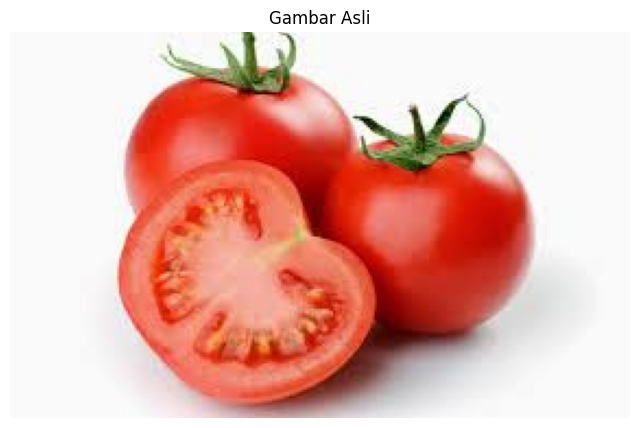

Tingkat Kematangan: Tomat Matang
Rasio area merah: 33.67%
Rasio area hijau: 1.26%
Rasio area oranye: 1.15%


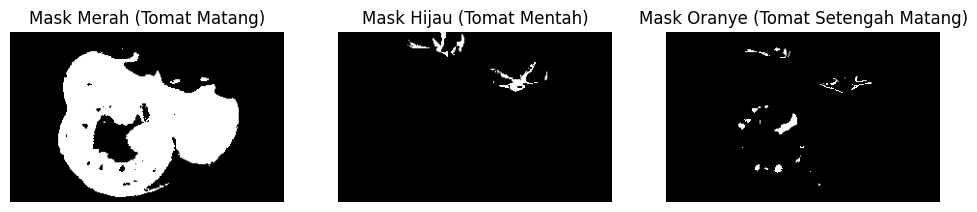

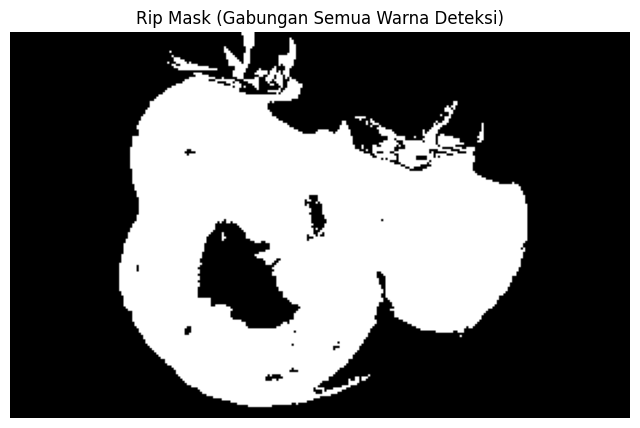

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengklasifikasikan kematangan tomat berdasarkan warna
def deteksi_kematangan_tomat(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar asli
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Gambar Asli")
    plt.show()

    # Mengubah gambar ke ruang warna HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Definisikan rentang warna untuk tomat
    # Rentang warna untuk tomat merah (matang)
    lower_red = np.array([0, 120, 120])
    upper_red = np.array([10, 255, 255])

    # Rentang warna untuk tomat hijau (mentah)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([90, 255, 255])

    # Rentang warna untuk tomat oranye (setengah matang)
    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([30, 255, 255])

    # Masking gambar untuk mendapatkan hanya warna merah (matang)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    red_area = cv2.bitwise_and(image, image, mask=mask_red)

    # Masking gambar untuk mendapatkan hanya warna hijau (mentah)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    green_area = cv2.bitwise_and(image, image, mask=mask_green)

    # Masking gambar untuk mendapatkan hanya warna oranye (setengah matang)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    orange_area = cv2.bitwise_and(image, image, mask=mask_orange)

    # Menghitung rasio area warna masing-masing terhadap total area gambar
    red_pixels = cv2.countNonZero(mask_red)
    green_pixels = cv2.countNonZero(mask_green)
    orange_pixels = cv2.countNonZero(mask_orange)
    total_pixels = image.shape[0] * image.shape[1]

    red_ratio = red_pixels / total_pixels
    green_ratio = green_pixels / total_pixels
    orange_ratio = orange_pixels / total_pixels

    # Menilai tingkat kematangan berdasarkan rasio warna
    if red_ratio > 0.5:
        status = "Tomat Mentah"
    elif orange_ratio > 0.3:
        status = "Tomat Setengah Matang"
    else:
        status = "Tomat Matang"

    print(f"Tingkat Kematangan: {status}")
    print(f"Rasio area merah: {red_ratio*100:.2f}%")
    print(f"Rasio area hijau: {green_ratio*100:.2f}%")
    print(f"Rasio area oranye: {orange_ratio*100:.2f}%")

    # Menampilkan mask untuk tiap warna
    plt.figure(figsize=(12, 8))

    # Gambar mask merah (matang)
    plt.subplot(1, 3, 1)
    plt.imshow(mask_red, cmap='gray')
    plt.title("Mask Merah (Tomat Matang)")
    plt.axis('off')

    # Gambar mask hijau (mentah)
    plt.subplot(1, 3, 2)
    plt.imshow(mask_green, cmap='gray')
    plt.title("Mask Hijau (Tomat Mentah)")
    plt.axis('off')

    # Gambar mask oranye (setengah matang)
    plt.subplot(1, 3, 3)
    plt.imshow(mask_orange, cmap='gray')
    plt.title("Mask Oranye (Tomat Setengah Matang)")
    plt.axis('off')

    plt.show()

    # Menampilkan gambar Rip Mask (gabungan semua warna)
    rip_mask = cv2.bitwise_or(mask_red, mask_orange)
    rip_mask = cv2.bitwise_or(rip_mask, mask_green)

    plt.figure(figsize=(8, 6))
    plt.imshow(rip_mask, cmap='gray')
    plt.title("Rip Mask (Gabungan Semua Warna Deteksi)")
    plt.axis('off')
    plt.show()

# Upload gambar ke Colab
from google.colab import files
uploaded = files.upload()

# Menggunakan gambar yang diupload untuk deteksi
for filename in uploaded.keys():
    deteksi_kematangan_tomat(filename)